In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
#Import libraries
from matplotlib import pyplot as plt

from operator import mod
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D,Activation
from keras.models import Sequential
from keras.utils.np_utils import to_categorical  # convert to one-hot-encoding
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

np.random.seed(2)


In [16]:
sns.set(style='white', context='notebook', palette='deep')


In [17]:
!mkdir Mnist
!cp /content/gdrive/My\ Drive/IITD_Learning_Resources/SIL810/Mnist/* ./Mnist/


mkdir: cannot create directory ‘Mnist’: File exists


In [18]:
# Reading data
train=pd.read_csv('./Mnist/train.csv')
test=pd.read_csv('./Mnist/test.csv')
# preparing data

Y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)

In [19]:
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [20]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train = X_train.values.reshape(-1, 28, 28, 1)  # -1 all values *unlimited*
test = test.values.reshape(-1, 28, 28, 1)
# Optimizing data

X_train = X_train/255.0
test = test/255.0
Y_train = to_categorical(Y_train, num_classes=10)
# Splitting

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=random_seed)

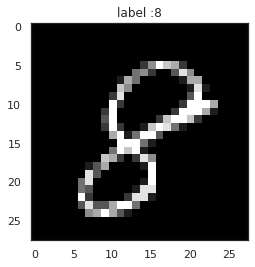

In [22]:
img = X_train[0]
img= img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title("label :"+str(np.argmax(Y_train[0])))
plt.show()


In [23]:
# Buildding the model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                 activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                 activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=256, kernel_size=(1,1), padding='Same',
                 activation='relu'))                            # CHANGE : CONV2d 1x1 instead of fully
# model.add(Dense(256, activation="relu"))
#model.add(Flatten())

model.add(Dropout(0.5))

model.add(Conv2D(filters=10, kernel_size=(1,1), padding='Same',
                 activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

#model.add(Dense(10, activation="softmax"))
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [24]:
#compile
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
# Printing model details

print('Model Details are : ')
print(model.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (Non

In [ ]:
epochs = 20
batch_size = 100
# Fitting model

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, Y_val), verbose=2)

Epoch 1/20
378/378 - 268s - loss: 1.2560 - accuracy: 0.5728 - val_loss: 0.6276 - val_accuracy: 0.8107
Epoch 2/20
378/378 - 257s - loss: 0.4335 - accuracy: 0.8706 - val_loss: 0.2536 - val_accuracy: 0.9305
Epoch 3/20
378/378 - 258s - loss: 0.2353 - accuracy: 0.9311 - val_loss: 0.1349 - val_accuracy: 0.9638
Epoch 4/20
378/378 - 257s - loss: 0.1571 - accuracy: 0.9529 - val_loss: 0.1201 - val_accuracy: 0.9671
Epoch 5/20
378/378 - 256s - loss: 0.1204 - accuracy: 0.9632 - val_loss: 0.1000 - val_accuracy: 0.9710
Epoch 6/20
378/378 - 257s - loss: 0.0951 - accuracy: 0.9704 - val_loss: 0.0587 - val_accuracy: 0.9805
Epoch 7/20
378/378 - 256s - loss: 0.0830 - accuracy: 0.9746 - val_loss: 0.0973 - val_accuracy: 0.9690
Epoch 8/20
378/378 - 256s - loss: 0.0711 - accuracy: 0.9783 - val_loss: 0.0759 - val_accuracy: 0.9774
Epoch 9/20
378/378 - 256s - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0603 - val_accuracy: 0.9814
Epoch 10/20
378/378 - 257s - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.0456 - 

In [ ]:
!ls

gdrive	Mnist  sample_data


In [ ]:
model.save("Lenet_FCN.h5")

In [ ]:
!cp Lenet_FCN.h5 /content/gdrive/My\ Drive/IITD_Learning_Resources/SIL810/